In [ ]:
#Primary Modules

import pandas as pd
import numpy as np

#Preprocessing Data

from nltk.tokenize import word_tokenize
from sklearn import preprocessing
from sklearn.impute import KNNImputer

#Feature Selection
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_classif
from lightgbm import plot_importance

#Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#Model_selection Tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score 

#Models
from lightgbm import LGBMClassifier as lgb

#Data Object Output
import pickle


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Import Data

train_data=pd.read_csv(r"/content/drive/My Drive/Colab Data/Pet Adoption/train.csv",parse_dates=['issue_date','listing_date'])
test_data=pd.read_csv(r"/content/drive/My Drive/Colab Data/Pet Adoption/test.csv")

<h1>Preliminary Ananlysis</h1>



In [ ]:
train_data[:25]

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1
5,ANSL_52200,2017-10-25,2019-03-10 13:18:00,0.0,Red,0.92,29.56,0,7,1.0,2
6,ANSL_75444,2018-11-06,2019-04-09 16:00:00,2.0,Brown Tabby,0.14,40.24,0,1,0.0,1
7,ANSL_52759,2018-06-05,2018-09-02 17:04:00,0.0,White,0.15,25.48,7,1,1.0,1
8,ANSL_74632,2015-10-10,2016-08-04 16:29:00,2.0,Brown,0.05,38.22,13,9,1.0,2
9,ANSL_56464,2014-02-18,2017-03-17 11:38:00,2.0,Brown,0.55,21.26,13,9,1.0,2


In [ ]:
test_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   pet_id          18834 non-null  object        
 1   issue_date      18834 non-null  datetime64[ns]
 2   listing_date    18834 non-null  datetime64[ns]
 3   condition       17357 non-null  float64       
 4   color_type      18834 non-null  object        
 5   length(m)       18834 non-null  float64       
 6   height(cm)      18834 non-null  float64       
 7   X1              18834 non-null  int64         
 8   X2              18834 non-null  int64         
 9   breed_category  18834 non-null  float64       
 10  pet_category    18834 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 1.6+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pet_id        8072 non-null   object 
 1   issue_date    8072 non-null   object 
 2   listing_date  8072 non-null   object 
 3   condition     7453 non-null   float64
 4   color_type    8072 non-null   object 
 5   length(m)     8072 non-null   float64
 6   height(cm)    8072 non-null   float64
 7   X1            8072 non-null   int64  
 8   X2            8072 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 567.7+ KB


In [ ]:
if len(train_data[train_data.duplicated()]) > 0:
  print("\n***Number of duplicated entries: ", len(train_data[train_data.duplicated()]))
  display(train_data[train_data.duplicated(keep=False)].sort_values(by=list(train_data.columns)).head())
else:
  print("\nNo duplicated entries found")



No duplicated entries found


In [ ]:
def time_series_plot(df):
  for p in ['D', 'M', 'Y']:
    if p=='D':
        print("Plotting daily data")
    elif p=='M':
      print("Plotting monthly data")
    else:
      print("Plotting yearly data")
    for col_num in ['breed_category','pet_category']:
      __ = df.copy()
      __ = __.set_index('issue_date')
      __T = __.resample(p).sum()
      ax = __T[[col_num]].plot()
      ax.set_ylim(bottom=0)
      ax.get_yaxis().set_major_formatter(
      FuncFormatter(lambda x, p: format(int(x), ',')))
      plt.show()

Plotting daily data


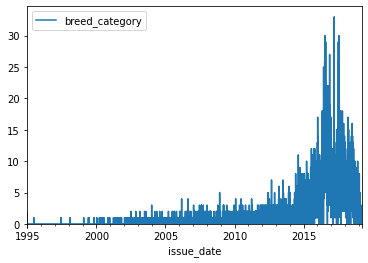

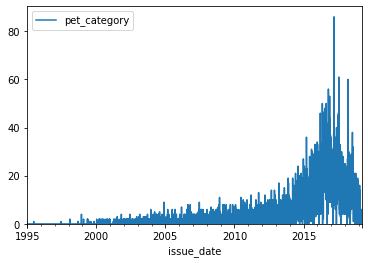

Plotting monthly data


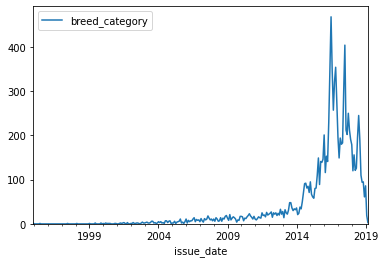

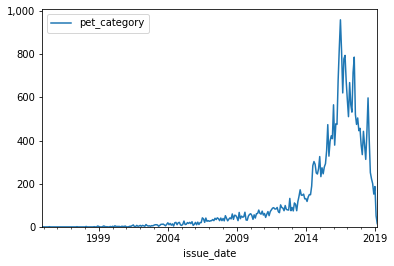

Plotting yearly data


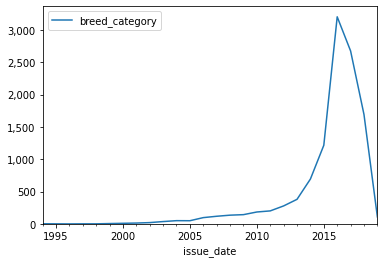

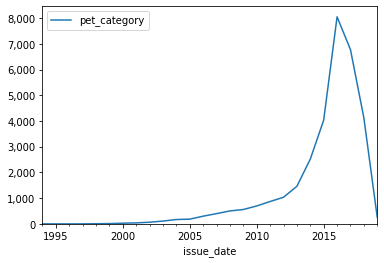

In [ ]:
time_series_plot(train_data)

In [ ]:
train_data['condition_impute']=train_data['condition'].copy()
test_data['condition_impute']=test_data['condition'].copy()

In [ ]:
train_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,condition_impute
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,2.0
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,1.0
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,NaN
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,1.0
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,2.0


In [ ]:
to_impute=['condition_impute']

In [ ]:
# We need to imput condition feature before furthur analysis

l_tr=train_data.columns
l_te=test_data.columns

imputer = KNNImputer(n_neighbors=137)
train_data[to_impute]=pd.DataFrame(imputer.fit_transform(train_data[to_impute]))
test_data[to_impute]=pd.DataFrame(imputer.fit_transform(test_data[to_impute]))


train_data.columns=l_tr
test_data.columns=l_te


In [ ]:
for i in range(0,18833):
    dummy=train_data.loc[i,'condition']
    if np.isnan(dummy):
        train_data.loc[i,'condition']=3

for i in range(0,8071):
    dummy=test_data.loc[i,'condition']
    if np.isnan(dummy):
        test_data.loc[i,'condition']=3

In [ ]:
train_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,condition_impute
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,2.00000
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,1.00000
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,3.0,Brown,0.15,40.90,15,4,2.0,4,0.88339
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,1.00000
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,2.00000


<h1> Exploratory Analysis</h1>

In [ ]:
train_data['pet_category'].unique()

array([1, 2, 4, 0])

In [ ]:
train_data['breed_category'].unique()

array([0., 2., 1.])

In [ ]:
train_data['color_type'].unique()

array(['Brown Tabby', 'White', 'Brown', 'Black', 'Red', 'Tricolor',
       'Calico', 'Brown Brindle', 'Blue', 'Tortie', 'Gray', 'Fawn',
       'Buff', 'Torbie', 'Orange Tabby', 'Sable', 'Tan', 'Blue Tick',
       'Orange', 'Blue Tabby', 'Chocolate', 'Black Tabby',
       'Black Brindle', 'Cream Tabby', 'Gold', 'Calico Point',
       'Blue Merle', 'Red Merle', 'Yellow', 'Lynx Point', 'Blue Cream',
       'Flame Point', 'Cream', 'Yellow Brindle', 'Blue Tiger',
       'Seal Point', 'Red Tick', 'Brown Merle', 'Black Smoke',
       'Gray Tabby', 'Green', 'Tortie Point', 'Blue Smoke', 'Apricot',
       'Blue Point', 'Silver Tabby', 'Lilac Point', 'Silver',
       'Brown Tiger', 'Liver', 'Agouti', 'Chocolate Point', 'Liver Tick',
       'Pink', 'Black Tiger', 'Silver Lynx Point'], dtype=object)

In [ ]:
train_data['X1'].unique()

array([13, 15,  0, 18,  7, 16, 11,  9, 12, 17,  2,  8,  3,  1,  4, 10,  6,
        5, 19, 14])

In [ ]:
train_data['X2'].unique()

array([9, 4, 1, 7, 6, 2, 8, 3, 5, 0])

In [ ]:
train_data['condition'].unique()

array([2., 1., 3., 0.])

In [ ]:
train_data['condition'].describe()

count    18834.000000
mean         1.049379
std          0.933175
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: condition, dtype: float64

In [ ]:

train_data['X1'].describe()

count    18834.000000
mean         5.369598
std          6.572366
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max         19.000000
Name: X1, dtype: float64

In [ ]:
train_data['X2'].describe()

count    18834.000000
mean         4.577307
std          3.517763
min          0.000000
25%          1.000000
50%          4.000000
75%          9.000000
max          9.000000
Name: X2, dtype: float64

In [ ]:
train_data['length(m)'].describe()

count    18834.000000
mean         0.502636
std          0.288705
min          0.000000
25%          0.250000
50%          0.500000
75%          0.760000
max          1.000000
Name: length(m), dtype: float64

In [ ]:
test_data['length(m)'].describe()

count    8072.000000
mean        0.507265
std         0.289615
min         0.000000
25%         0.260000
50%         0.510000
75%         0.760000
max         1.000000
Name: length(m), dtype: float64

In [ ]:
train_data['height(cm)'].describe()

count    18834.000000
mean        27.448832
std         13.019781
min          5.000000
25%         16.172500
50%         27.340000
75%         38.890000
max         50.000000
Name: height(cm), dtype: float64

In [ ]:
#Mapping relations of specific color keywords with pet_category

color_pet=['Black', 'Orange', 'Brown', 'White', 'Fawn',
       'Red', 'Tabby', 'Tan', 'Apricot', 'Tricolor', 'Brindle',
       'Gray', 'Chocolate', 'Blue', 'Yellow', 'Merle',
       'Point', 'Calico', 'Tortie', 'Buff',
       'Cream', 'Sable', 'Silver','Tick', 'Flame', 'Torbie','Smoke', 'Seal', 
       'Lynx', 'Agouti', 'Gold', 'Green','Tiger', 'Pink', 'Liver']


for col_pet in color_pet:
  breed={0:0,1:0,2:0}
  pet={0:0,1:0,2:0,4:0}
  for i in range(0,18833):
    dummy=train_data.iloc(axis=0)[i,4]
    x=train_data.iloc[i,9]
    y=train_data.iloc[i,10]
    if col_pet in dummy:
      
        breed[x]=breed[x]+1
        pet[y]=pet[y]+1
  print('For: ',col_pet,'The pet cat are: ',pet)
  count=0

For:  Black The pet cat are:  {0: 16, 1: 1766, 2: 2799, 4: 193}
For:  Orange The pet cat are:  {0: 1, 1: 822, 2: 1, 4: 6}
For:  Brown The pet cat are:  {0: 10, 1: 1702, 2: 1868, 4: 436}
For:  White The pet cat are:  {0: 15, 1: 433, 2: 1917, 4: 88}
For:  Fawn The pet cat are:  {0: 0, 1: 0, 2: 157, 4: 2}
For:  Red The pet cat are:  {0: 8, 1: 0, 2: 510, 4: 44}
For:  Tabby The pet cat are:  {0: 0, 1: 3193, 2: 0, 4: 0}
For:  Tan The pet cat are:  {0: 2, 1: 2, 2: 1336, 4: 9}
For:  Apricot The pet cat are:  {0: 0, 1: 0, 2: 13, 4: 0}
For:  Tricolor The pet cat are:  {0: 3, 1: 1, 2: 454, 4: 11}
For:  Brindle The pet cat are:  {0: 0, 1: 0, 2: 576, 4: 1}
For:  Gray The pet cat are:  {0: 18, 1: 118, 2: 123, 4: 113}
For:  Chocolate The pet cat are:  {0: 0, 1: 12, 2: 251, 4: 5}
For:  Blue The pet cat are:  {0: 4, 1: 841, 2: 560, 4: 4}
For:  Yellow The pet cat are:  {0: 5, 1: 3, 2: 149, 4: 1}
For:  Merle The pet cat are:  {0: 0, 1: 1, 2: 155, 4: 0}
For:  Point The pet cat are:  {0: 0, 1: 337, 2: 0, 4

<h1> Feature Engineering

In [ ]:
combine = [train_data, test_data]
for df in combine:
  df['year_i'] = pd.DatetimeIndex(df['issue_date']).year
  df['month_i'] = pd.DatetimeIndex(df['issue_date']).month

for df in combine:
  df['year_l'] = pd.DatetimeIndex(df['listing_date']).year
  df['month_l'] = pd.DatetimeIndex(df['listing_date']).month

for df in combine:
  df['y&m_i'] = (df['year_i']-1990)*12+df['month_i']
  df['y&m_l'] = (df['year_l']-1990)*12+df['month_l']
  df['diff']=df['y&m_l']-df['y&m_i']


In [ ]:
train_data.to_pickle(r"/content/drive/My Drive/Colab Data/Pet Adoption/basic_train.pickle")
test_data.to_pickle(r"/content/drive/My Drive/Colab Data/Pet Adoption/basic_test.pickle")

In [ ]:
color_pet_1=[ 'Fawn','Tabby', 'Tan', 'Apricot', 'Tricolor', 'Brindle', 'Merle',
       'Point', 'Calico', 'Tortie', 'Buff',
       'Sable','Tick', 'Flame', 'Torbie','Smoke', 'Seal', 
       'Lynx', 'Gold', 'Green', 'Pink', 'Liver' ]


for col_pet in color_pet_1:
  breed={0:0,1:0,2:0}
  pet={0:0,1:0,2:0,4:0}
  for i in range(0,18833):
    dummy=train_data.iloc(axis=0)[i,4]
    count=count+1
    x=train_data.iloc[i,9]
    y=train_data.iloc[i,10]
    if col_pet in dummy:  
        breed[x]=breed[x]+1
        pet[y]=pet[y]+1
  print('For: ',col_pet,'The pet cat are: ',pet)
  count=0

For:  Fawn The pet cat are:  {0: 0, 1: 0, 2: 157, 4: 2}
For:  Tabby The pet cat are:  {0: 0, 1: 3193, 2: 0, 4: 0}
For:  Tan The pet cat are:  {0: 2, 1: 2, 2: 1336, 4: 9}
For:  Apricot The pet cat are:  {0: 0, 1: 0, 2: 13, 4: 0}
For:  Tricolor The pet cat are:  {0: 3, 1: 1, 2: 454, 4: 11}
For:  Brindle The pet cat are:  {0: 0, 1: 0, 2: 576, 4: 1}
For:  Merle The pet cat are:  {0: 0, 1: 1, 2: 155, 4: 0}
For:  Point The pet cat are:  {0: 0, 1: 337, 2: 0, 4: 0}
For:  Calico The pet cat are:  {0: 0, 1: 350, 2: 0, 4: 5}
For:  Tortie The pet cat are:  {0: 0, 1: 391, 2: 0, 4: 1}
For:  Buff The pet cat are:  {0: 0, 1: 2, 2: 121, 4: 2}
For:  Sable The pet cat are:  {0: 0, 1: 0, 2: 158, 4: 9}
For:  Tick The pet cat are:  {0: 0, 1: 0, 2: 45, 4: 0}
For:  Flame The pet cat are:  {0: 0, 1: 52, 2: 0, 4: 0}
For:  Torbie The pet cat are:  {0: 0, 1: 242, 2: 0, 4: 0}
For:  Smoke The pet cat are:  {0: 0, 1: 36, 2: 2, 4: 0}
For:  Seal The pet cat are:  {0: 0, 1: 78, 2: 0, 4: 0}
For:  Lynx The pet cat are:  

In [ ]:
train_data['color_tag']=train_data['color_type']
test_data['color_tag']=test_data['color_type']

In [ ]:
color_pet_2=[ 'Fawn','Tabby', 'Tan', 'Apricot', 'Tricolor', 'Brindle', 'Merle',
       'Point', 'Calico', 'Tortie', 'Buff',
       'Sable','Tick', 'Flame', 'Torbie','Smoke', 'Seal', 
       'Lynx', 'Gold', 'Pink', 'Liver' ]

for col_pet in color_pet_2:
  for i in range(0,18833):
    dummy=train_data.loc[i,'color_type']
    if col_pet in dummy:
        train_data.loc[i,'color_tag']=col_pet

for col_pet in color_pet_2:
  for i in range(0,8071):
    dummy=test_data.loc[i,'color_type']
    if col_pet in dummy:
        test_data.loc[i,'color_tag']=col_pet

In [ ]:
train_data['color_tag'].unique()

array(['Tabby', 'White', 'Brown', 'Black', 'Red', 'Tricolor', 'Calico',
       'Brindle', 'Blue', 'Tortie', 'Gray', 'Fawn', 'Buff', 'Torbie',
       'Sable', 'Tan', 'Tick', 'Orange', 'Chocolate', 'Gold', 'Merle',
       'Yellow', 'Lynx', 'Blue Cream', 'Flame', 'Cream', 'Blue Tiger',
       'Seal', 'Smoke', 'Green', 'Apricot', 'Point', 'Silver',
       'Brown Tiger', 'Liver', 'Agouti', 'Pink', 'Black Tiger'],
      dtype=object)

In [ ]:
test_data['color_tag'].unique()

array(['Black', 'Tabby', 'Brown', 'White', 'Fawn', 'Red', 'Tan',
       'Apricot', 'Tricolor', 'Brindle', 'Gray', 'Chocolate', 'Blue',
       'Yellow', 'Merle', 'Lynx', 'Calico', 'Tortie', 'Buff', 'Point',
       'Cream', 'Sable', 'Silver', 'Tick', 'Flame', 'Torbie', 'Smoke',
       'Seal', 'Blue Cream', 'Orange', 'Agouti', 'Gold', 'Green',
       'Blue Tiger', 'Pink', 'Liver'], dtype=object)

In [ ]:
train_data['pet_pred']=""
test_data['pet_pred']=""

In [ ]:
col_1=['Tabby','Point','Calico','Tortie','Flame', 'Torbie','Smoke', 'Seal','Lynx']
col_2=['Fawn','Tan','Apricot','Tricolor','Brindle','Merle','Buff','Sable','Tick','Gold', 'Liver']

for i in range(0,18833):
  dummy=train_data.loc[i,'color_tag']
  if dummy in col_1:
      train_data.loc[i,'pet_pred']=1
  elif dummy in col_2:
      train_data.loc[i,'pet_pred']=2

for i in range(0,8071):
  dummy=test_data.loc[i,'color_tag']
  if dummy in col_1:
      test_data.loc[i,'pet_pred']=1
  elif dummy in col_2:
      test_data.loc[i,'pet_pred']=2

In [ ]:
train_data['pet_pred'].unique()

array([1, '', 2], dtype=object)

In [ ]:
color_mapping = {}

mapper=train_data['color_type'].unique()

for i,name in enumerate(mapper):
  color_mapping[name]=i

for dataset in combine:
    dataset['color_type'] = dataset['color_type'].map(color_mapping)


In [ ]:
color_mapping_x = {}

mapper_x=train_data['color_tag'].unique()

for i,name in enumerate(mapper_x):
  color_mapping_x[name]=i

for dataset in combine:
    dataset['color_tag'] = dataset['color_tag'].map(color_mapping_x)

In [ ]:
color_mapping_pred = {}

mapper=train_data['pet_pred'].unique()

for i,name in enumerate(mapper):
  color_mapping_pred[name]=i

color_mapping_pred['']=-1

for dataset in combine:
    dataset['pet_pred'] = dataset['pet_pred'].map(color_mapping_pred)


In [ ]:
color_mapping_pred

{'': -1, 1: 0, 2: 2}

In [ ]:
train_data['condition'].unique()

array([2., 1., 3., 0.])

In [ ]:
test_data.columns

Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2', 'condition_impute', 'year_i',
       'month_i', 'year_l', 'month_l', 'y&m_i', 'y&m_l', 'diff', 'color_tag',
       'pet_pred'],
      dtype='object')

In [ ]:
train_data=train_data.drop(labels=[ 'year_i','month_i', 'year_l', 'month_l', 'y&m_i', 'y&m_l'],axis=1)
test_data=test_data.drop(labels=[ 'year_i','month_i', 'year_l', 'month_l', 'y&m_i', 'y&m_l'],axis=1)

In [ ]:
test_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,condition_impute,diff,color_tag,pet_pred
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,3,0.87,42.73,0,7,0.0,145,3,-1
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,14,0.06,6.71,0,1,1.0,6,0,0
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,3,0.24,41.21,0,7,1.0,66,3,-1
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,3,0.29,8.46,7,1,1.0,38,3,-1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,2,0.71,30.92,0,7,1.0,15,2,-1


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pet_id            18834 non-null  object 
 1   issue_date        18834 non-null  object 
 2   listing_date      18834 non-null  object 
 3   condition         18834 non-null  float64
 4   color_type        18834 non-null  int64  
 5   length(m)         18834 non-null  float64
 6   height(cm)        18834 non-null  float64
 7   X1                18834 non-null  int64  
 8   X2                18834 non-null  int64  
 9   breed_category    18834 non-null  float64
 10  pet_category      18834 non-null  int64  
 11  condition_impute  18834 non-null  float64
 12  diff              18834 non-null  int64  
 13  color_tag         18834 non-null  int64  
 14  pet_pred          18834 non-null  int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 2.2+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pet_id            8072 non-null   object 
 1   issue_date        8072 non-null   object 
 2   listing_date      8072 non-null   object 
 3   condition         8072 non-null   float64
 4   color_type        8072 non-null   int64  
 5   length(m)         8072 non-null   float64
 6   height(cm)        8072 non-null   float64
 7   X1                8072 non-null   int64  
 8   X2                8072 non-null   int64  
 9   condition_impute  8072 non-null   float64
 10  diff              8072 non-null   int64  
 11  color_tag         8072 non-null   int64  
 12  pet_pred          8072 non-null   int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 819.9+ KB


In [ ]:
train_data.to_pickle(r"/content/drive/My Drive/Colab Data/Pet Adoption/modified_train.pickle")
test_data.to_pickle(r"/content/drive/My Drive/Colab Data/Pet Adoption/modified_test.pickle")

Feature Selection

In [ ]:
train_data=pd.read_pickle(r"/content/drive/My Drive/Colab Data/Pet Adoption/modified_train.pickle")
test_data=pd.read_pickle(r"/content/drive/My Drive/Colab Data/Pet Adoption/modified_test.pickle")

In [ ]:
train_data.columns

Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category', 'pet_category',
       'condition_impute', 'diff', 'color_tag', 'pet_pred'],
      dtype='object')

In [ ]:
test_features= ['condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2',
       'condition_impute', 'diff', 'color_tag', 'pet_pred']

In [ ]:
X_b= train_data[test_features].copy()
X_p= train_data[test_features].copy()

In [ ]:
y_b=train_data['breed_category'].to_numpy()
y_b = y_b.reshape(y_b.shape[0], )
y_b=pd.Series(y_b)

y_p=train_data['pet_category'].to_numpy()
y_p = y_p.reshape(y_p.shape[0], )
y_p=pd.Series(y_p)

In [1]:
#Percentile selction using Generic Univariate Select

Selector_1 = GenericUnivariateSelect(mutual_info_classif,mode="percentile")
Fit_data = Selector_1.fit_transform(X_b,y_b)

Sort_Score_1 = Selector_1.scores_[::]

scores= zip(test_features,Sort_Score_1)   
 
final_scores= pd.DataFrame(scores, columns = ['test_features', 'Percentile'])

plt.figure(figsize=(17,8))

import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

sns.barplot(x="test_features",y="Percentile",data=final_scores)

NameError: ignored

In [ ]:

#Mutual Info Classification of Features

mi_b=mutual_info_classif(X_b,y_b)
lst=X_b.columns.tolist()
mi_b=pd.DataFrame(mi_b,columns=['MI_Classification_b'])
mi_b['Feature']=lst

columns_titles = ["Feature","MI_Classification_b"]
mi_b=mi_b.reindex(columns=columns_titles)

print(mi_b)

            Feature  MI_Classification_b
0         condition             0.756282
1        color_type             0.076650
2         length(m)             0.002847
3        height(cm)             0.000000
4                X1             0.108553
5                X2             0.113255
6  condition_impute             0.756787
7              diff             0.070098
8         color_tag             0.068565
9          pet_pred             0.011885


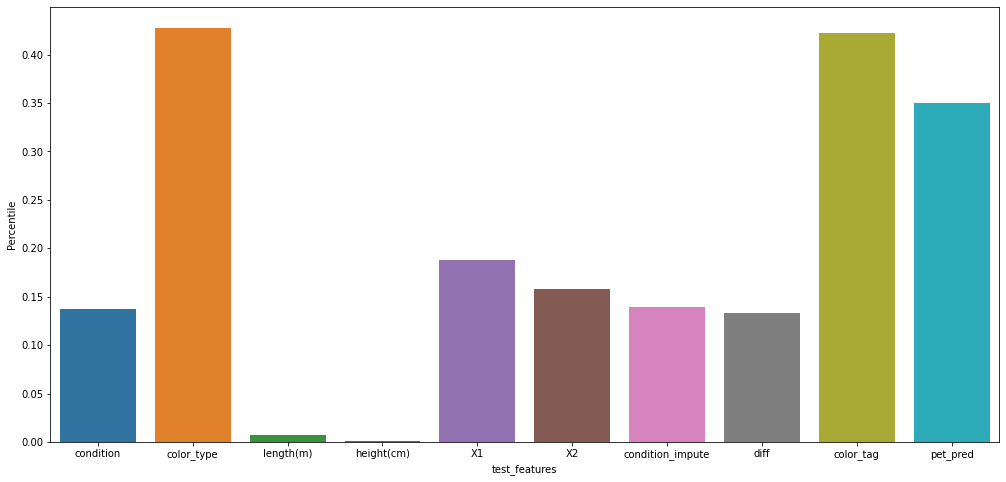

In [ ]:
#Select Percentile selction using Generic Univariate Select

Selector_1 = GenericUnivariateSelect(mutual_info_classif,mode="percentile")
Fit_data = Selector_1.fit_transform(X_p,y_p)

Sort_Score_1 = Selector_1.scores_[::]

scores= zip(test_features,Sort_Score_1)
 
final_scores= pd.DataFrame(scores, columns = ['test_features', 'Percentile'])

plt.figure(figsize=(17,8))
sns.barplot(x="test_features",y="Percentile",data=final_scores)

In [ ]:
mi_p=mutual_info_classif(X_p,y_p)
lst=X_p.columns.tolist()
mi_p=pd.DataFrame(mi_p,columns=['MI_Classification_p'])
mi_p['Feature']=lst

columns_titles = ["Feature","MI_Classification_p"]
mi_p=mi_p.reindex(columns=columns_titles)

print(mi_p)

            Feature  MI_Classification_p
0         condition             0.132913
1        color_type             0.425754
2         length(m)             0.000000
3        height(cm)             0.001972
4                X1             0.188219
5                X2             0.165904
6  condition_impute             0.136591
7              diff             0.138606
8         color_tag             0.428146
9          pet_pred             0.347968


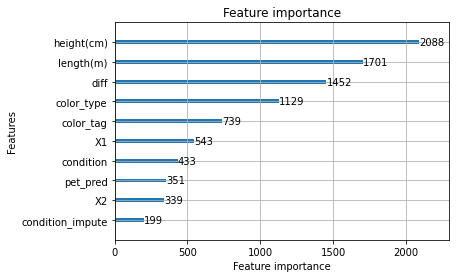

In [ ]:
Feature_Imp = lgb()
Feature_Imp.fit(X_b, y_b)

plot_importance(Feature_Imp)
plt.show()

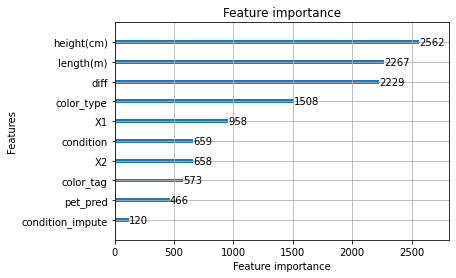

In [ ]:
Feature_Imp = lgb()
Feature_Imp.fit(X_p, y_p)

plot_importance(Feature_Imp)
plt.show()

In [ ]:
X_b= train_data[test_features].copy()
X_p= train_data[test_features].copy()

In [ ]:
X_b_train,X_b_valid,y_b_train,y_b_valid=train_test_split(X_b,y_b,test_size=0.3,random_state=21)

benchmark_model=lgb(n_estimators=10000,random_state=21,verbose=1,early_stopping_rounds=200)

eval_set = [(X_b_valid, y_b_valid)]

benchmark_model.fit(X_b_train, y_b_train,eval_metric="error", eval_set=eval_set, verbose=False)
pred=benchmark_model.predict(X_b_valid)
        
y_b_valid=y_b_valid.to_numpy()
f1=f1_score(y_b_valid,pred,average="weighted")

print(f1)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0.8992372179365118


In [ ]:
X_p_train,X_p_valid,y_p_train,y_p_valid=train_test_split(X_p,y_p,test_size=30,random_state=21)

benchmark_model=lgb(n_estimators=10000,random_state=21,verbose=2,early_stopping_rounds=200)
eval_set = [(X_p_valid, y_p_valid)]

benchmark_model.fit(X_p_train, y_p_train,eval_metric="error", eval_set=eval_set, verbose=False)
pred=benchmark_model.predict(X_p_valid)

y_p_valid=y_p_valid.to_numpy()
f1=f1_score(y_p_valid,pred,average="weighted")

print(f1)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0.8702277432712215


In [ ]:
Final_features_b = ['condition','color_type','length(m)','height(cm)','X1','X2','diff']
Final_features_p = ['condition_impute','color_tag','pet_pred','X1','X2','diff']

X_b= train_data[Final_features_b].copy()
X_p= train_data[Final_features_p].copy()

In [ ]:
X_b_train,X_b_valid,y_b_train,y_b_valid=train_test_split(X_b,y_b,test_size=0.3,random_state=21)

benchmark_model=lgb(n_estimators=10000,random_state=21,verbose=1,early_stopping_rounds=200)

eval_set = [(X_b_valid, y_b_valid)]

benchmark_model.fit(X_b_train, y_b_train,eval_metric="error", eval_set=eval_set, verbose=False)
pred=benchmark_model.predict(X_b_valid)
        
y_b_valid=y_b_valid.to_numpy()
f1=f1_score(y_b_valid,pred,average="weighted")

print(f1)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0.8992468242539529


In [ ]:
X_p_train,X_p_valid,y_p_train,y_p_valid=train_test_split(X_p,y_p,test_size=30,random_state=21)

benchmark_model=lgb(n_estimators=10000,random_state=21,verbose=2,early_stopping_rounds=200)
eval_set = [(X_p_valid, y_p_valid)]

benchmark_model.fit(X_p_train, y_p_train,eval_metric="error", eval_set=eval_set, verbose=False)
pred=benchmark_model.predict(X_p_valid)

y_p_valid=y_p_valid.to_numpy()
f1=f1_score(y_p_valid,pred,average="weighted")

print(f1)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0.8702277432712215
